<a href="https://colab.research.google.com/github/deepalakshmi21/Brain-Tumor-Analysis/blob/master/Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3),
               activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_datagen=ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
train_generator=train_datagen.flow_from_directory('drive/My Drive/Datasets/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 510 images belonging to 2 classes.


In [ ]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

510
32
7


In [ ]:
classifier.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
r = classifier.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

Epoch 1/20
15/15 [==============================] - 152s 10s/step - loss: 0.8162 - acc: 0.4979
Epoch 2/20
15/15 [==============================] - 37s 2s/step - loss: 0.6993 - acc: 0.4414
Epoch 3/20
15/15 [==============================] - 29s 2s/step - loss: 0.6933 - acc: 0.4875
Epoch 4/20
15/15 [==============================] - 29s 2s/step - loss: 0.6930 - acc: 0.5252
Epoch 5/20
15/15 [==============================] - 29s 2s/step - loss: 0.6931 - acc: 0.5104
Epoch 6/20
15/15 [==============================] - 29s 2s/step - loss: 0.6931 - acc: 0.5063
Epoch 7/20
15/15 [==============================] - 29s 2s/step - loss: 0.6931 - acc: 0.5042
Epoch 8/20
15/15 [==============================] - 29s 2s/step - loss: 0.6929 - acc: 0.5146
Epoch 9/20
15/15 [==============================] - 29s 2s/step - loss: 0.6931 - acc: 0.5084
Epoch 10/20
15/15 [==============================] - 28s 2s/step - loss: 0.6928 - acc: 0.5167
Epoch 11/20
15/15 [==============================] - 29s 2s/step - 

dict_keys(['loss', 'acc'])


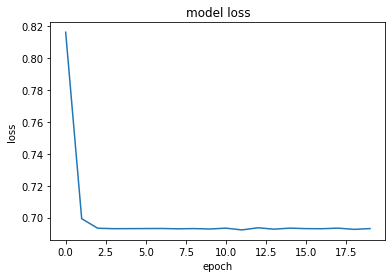

In [ ]:
import matplotlib.pyplot as plt
print(r.history.keys())
# Loss
plt.plot(r.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

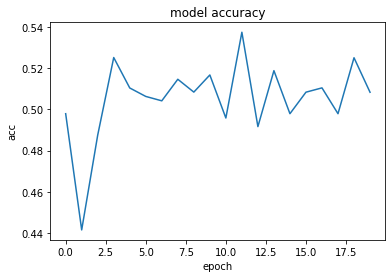

In [ ]:
plt.plot(r.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
img_path = 'drive/My Drive/Datasets/testing set/tumor/000437.png'

In [ ]:
img = image.load_img(img_path,target_size=(224,224))
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)